#**`This notebook is an Illustration to create a Decision Tree Classifier with Sklearn using Python 🌳🐍`**

For more information, check out the [Decision Tree](https://scikit-learn.org/stable/modules/tree.html).

## **Setup**
Let's setup the imports:      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# custom color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93']) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Dataset**
Let's load the Mobile Price Classification dataset which is uploaded on my Google Drive.

In [2]:
!gdown --id 17wpxB4XilNQ54Yf7aYrpK6vTrvE7f5Gh 
!gdown --id 1hxdj2JGckweySFIJluiCztjAndsNLfGG

Downloading...
From: https://drive.google.com/uc?id=17wpxB4XilNQ54Yf7aYrpK6vTrvE7f5Gh
To: /content/train.csv
100% 122k/122k [00:00<00:00, 45.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hxdj2JGckweySFIJluiCztjAndsNLfGG
To: /content/test.csv
100% 63.9k/63.9k [00:00<00:00, 60.1MB/s]


Let's read the CVS files:  

In [3]:
df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv") 

In [4]:
df.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.isnull().sum() 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In the dataset there is no need to create dummy variables or handle missing data as data set doesn't have any missing data.

Let's see the columns present in our dataFrame:

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Let's set our variables for training from our dataFrame into numpy arrays:

In [8]:
y_t = np.array(df['price_range']) 
x_t = df
x_t = df.drop(['price_range'], axis=1)
x_t = np.array(x_t)

In [9]:
print("shape of x :"+str(x_t.shape))
print("shape of y :"+str(y_t.shape))

shape of x :(2000, 20)
shape of y :(2000,)


Let's scale our numpy variables using sklearn's MinMaxScalar:

Reference: [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)  

In [10]:
scaler = MinMaxScaler() 
x_t = scaler.fit_transform(x_t) 

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(x_t, y_t, test_size=.20, random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape)) 

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [12]:
# plotting the decision boundries for the data 
#converting the data to array for plotting.
x = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of x:"+str(x.shape))
print("Shape of y:"+str(y.shape))
x = scaler.fit_transform(x) 

Shape of x:(2000, 2)
Shape of y:(2000,)


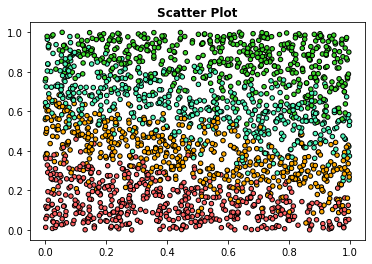

In [13]:
plt.scatter(x[:,0], x[:,1], c = y, cmap = cm_dark, s=20, label = y, edgecolors='k') 
plt.title("Scatter Plot", fontweight='bold')
plt.show();

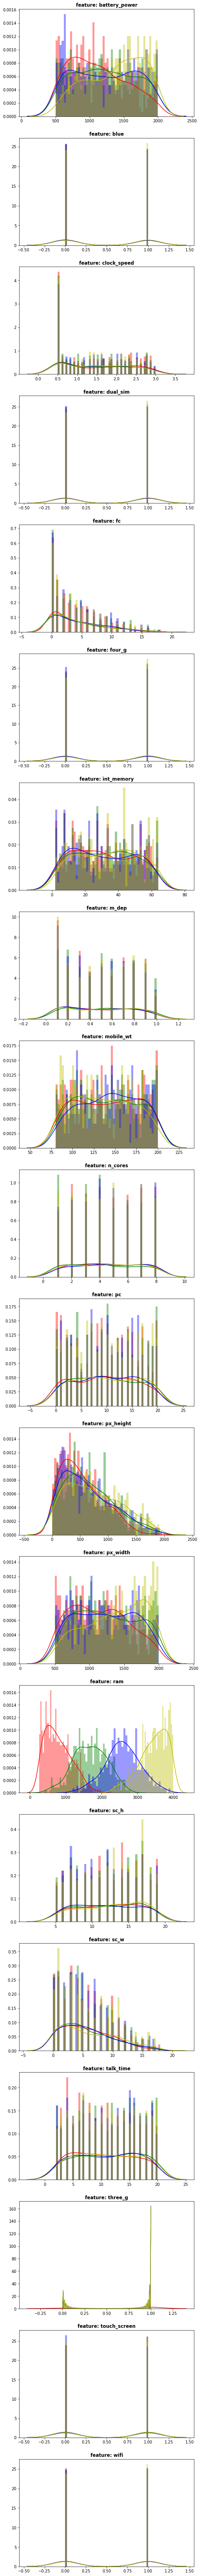

In [14]:
#let us check correlations, shapes and distribution of those 20 features.
# Features V1, V2, ... V20 are the features.
gs = gridspec.GridSpec(20, 1)
plt.figure(figsize=(8,20*6))
for i, col in enumerate(df[df.iloc[:,0:20].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.price_range == 0], bins=50, color='r')
    sns.distplot(df[col][df.price_range == 1], bins=50, color='g')
    sns.distplot(df[col][df.price_range == 2], bins=50, color='b')
    sns.distplot(df[col][df.price_range == 3], bins=50, color='y')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col), fontweight='bold')
plt.show()

##**Decision Tree Classifier**

In [15]:
#Decision Tree with differnt max_depth ad gini impurity 
for max_depth_values in [1, 2, 3, 4, 5, 7, 9, 11, 14, 17, 20]:
  dtc = DecisionTreeClassifier(max_depth=max_depth_values, criterion='gini', max_features=20, min_samples_split=4).fit(X_train, Y_train) 
  scoretrain = dtc.score(X_train, Y_train)
  scoretest = dtc.score(X_test, Y_test) 
  print("Decision Tree of max_depth: {}, Training Score: {:2f}, Testing Score: {:2f}\n".format(max_depth_values, scoretrain, scoretest))

Decision Tree of max_depth: 1, Training Score: 0.489375, Testing Score: 0.542500

Decision Tree of max_depth: 2, Training Score: 0.763125, Testing Score: 0.750000

Decision Tree of max_depth: 3, Training Score: 0.780625, Testing Score: 0.740000

Decision Tree of max_depth: 4, Training Score: 0.835625, Testing Score: 0.795000

Decision Tree of max_depth: 5, Training Score: 0.868750, Testing Score: 0.800000

Decision Tree of max_depth: 7, Training Score: 0.949375, Testing Score: 0.842500

Decision Tree of max_depth: 9, Training Score: 0.970625, Testing Score: 0.835000

Decision Tree of max_depth: 11, Training Score: 0.983750, Testing Score: 0.835000

Decision Tree of max_depth: 14, Training Score: 0.986250, Testing Score: 0.835000

Decision Tree of max_depth: 17, Training Score: 0.987500, Testing Score: 0.827500

Decision Tree of max_depth: 20, Training Score: 0.987500, Testing Score: 0.832500



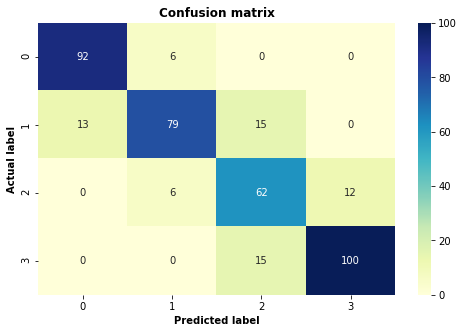

In [16]:
y_pred = dtc.predict(X_test)  
cm = confusion_matrix(y_pred, Y_test) 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');

In [17]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       105
           1       0.74      0.87      0.80        91
           2       0.78      0.67      0.72        92
           3       0.87      0.89      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



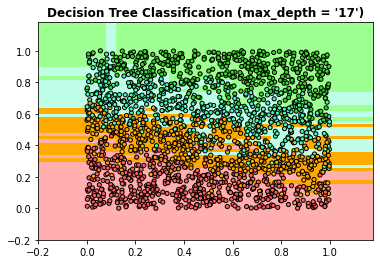

In [18]:
h =0.02
max_depth_value = 17
dtc1 = DecisionTreeClassifier(max_depth=max_depth_value, criterion='gini')
dtc1.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dtc1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark, edgecolor='k', s=17)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Tree Classification (max_depth = '%s')"% (max_depth_value), fontweight='bold')

plt.show()

##**Tree Visualization**

Let's see how each node of the classifier tree looks, so I'm setting the max_depth to 2:

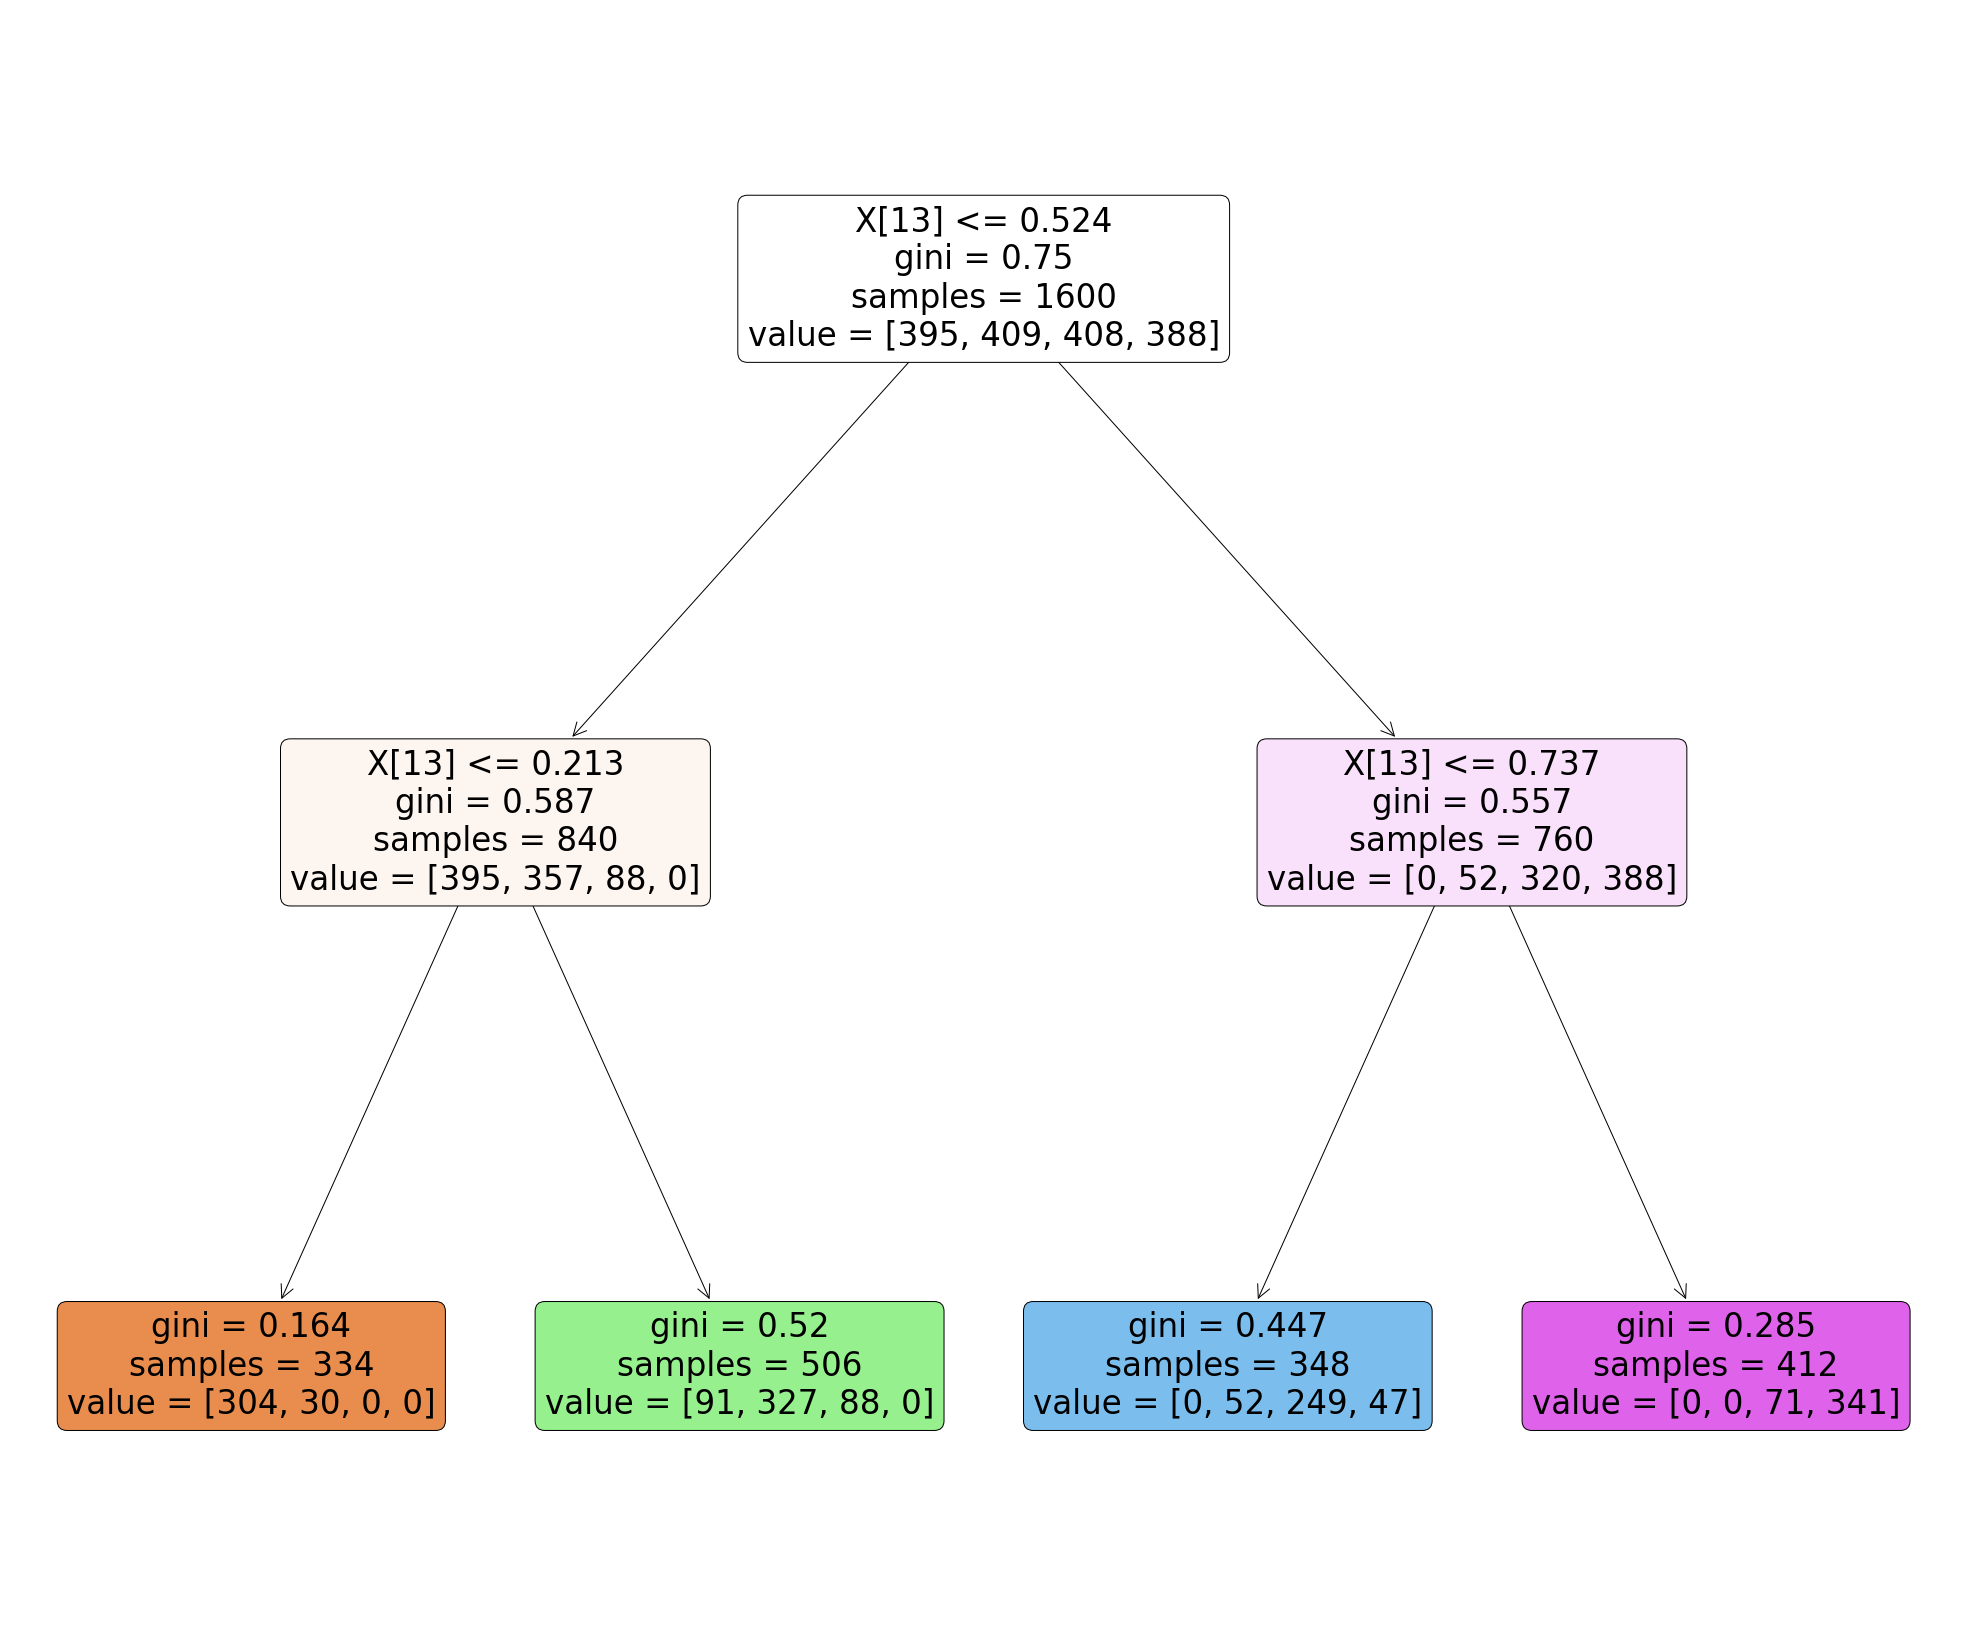

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=2)
clf = clf.fit(X_train, Y_train)
fig = plt.figure(figsize=(35,30))
dot_data = tree.plot_tree(clf, filled=True, rounded=True) 

Let's see the complete classifier Tree:

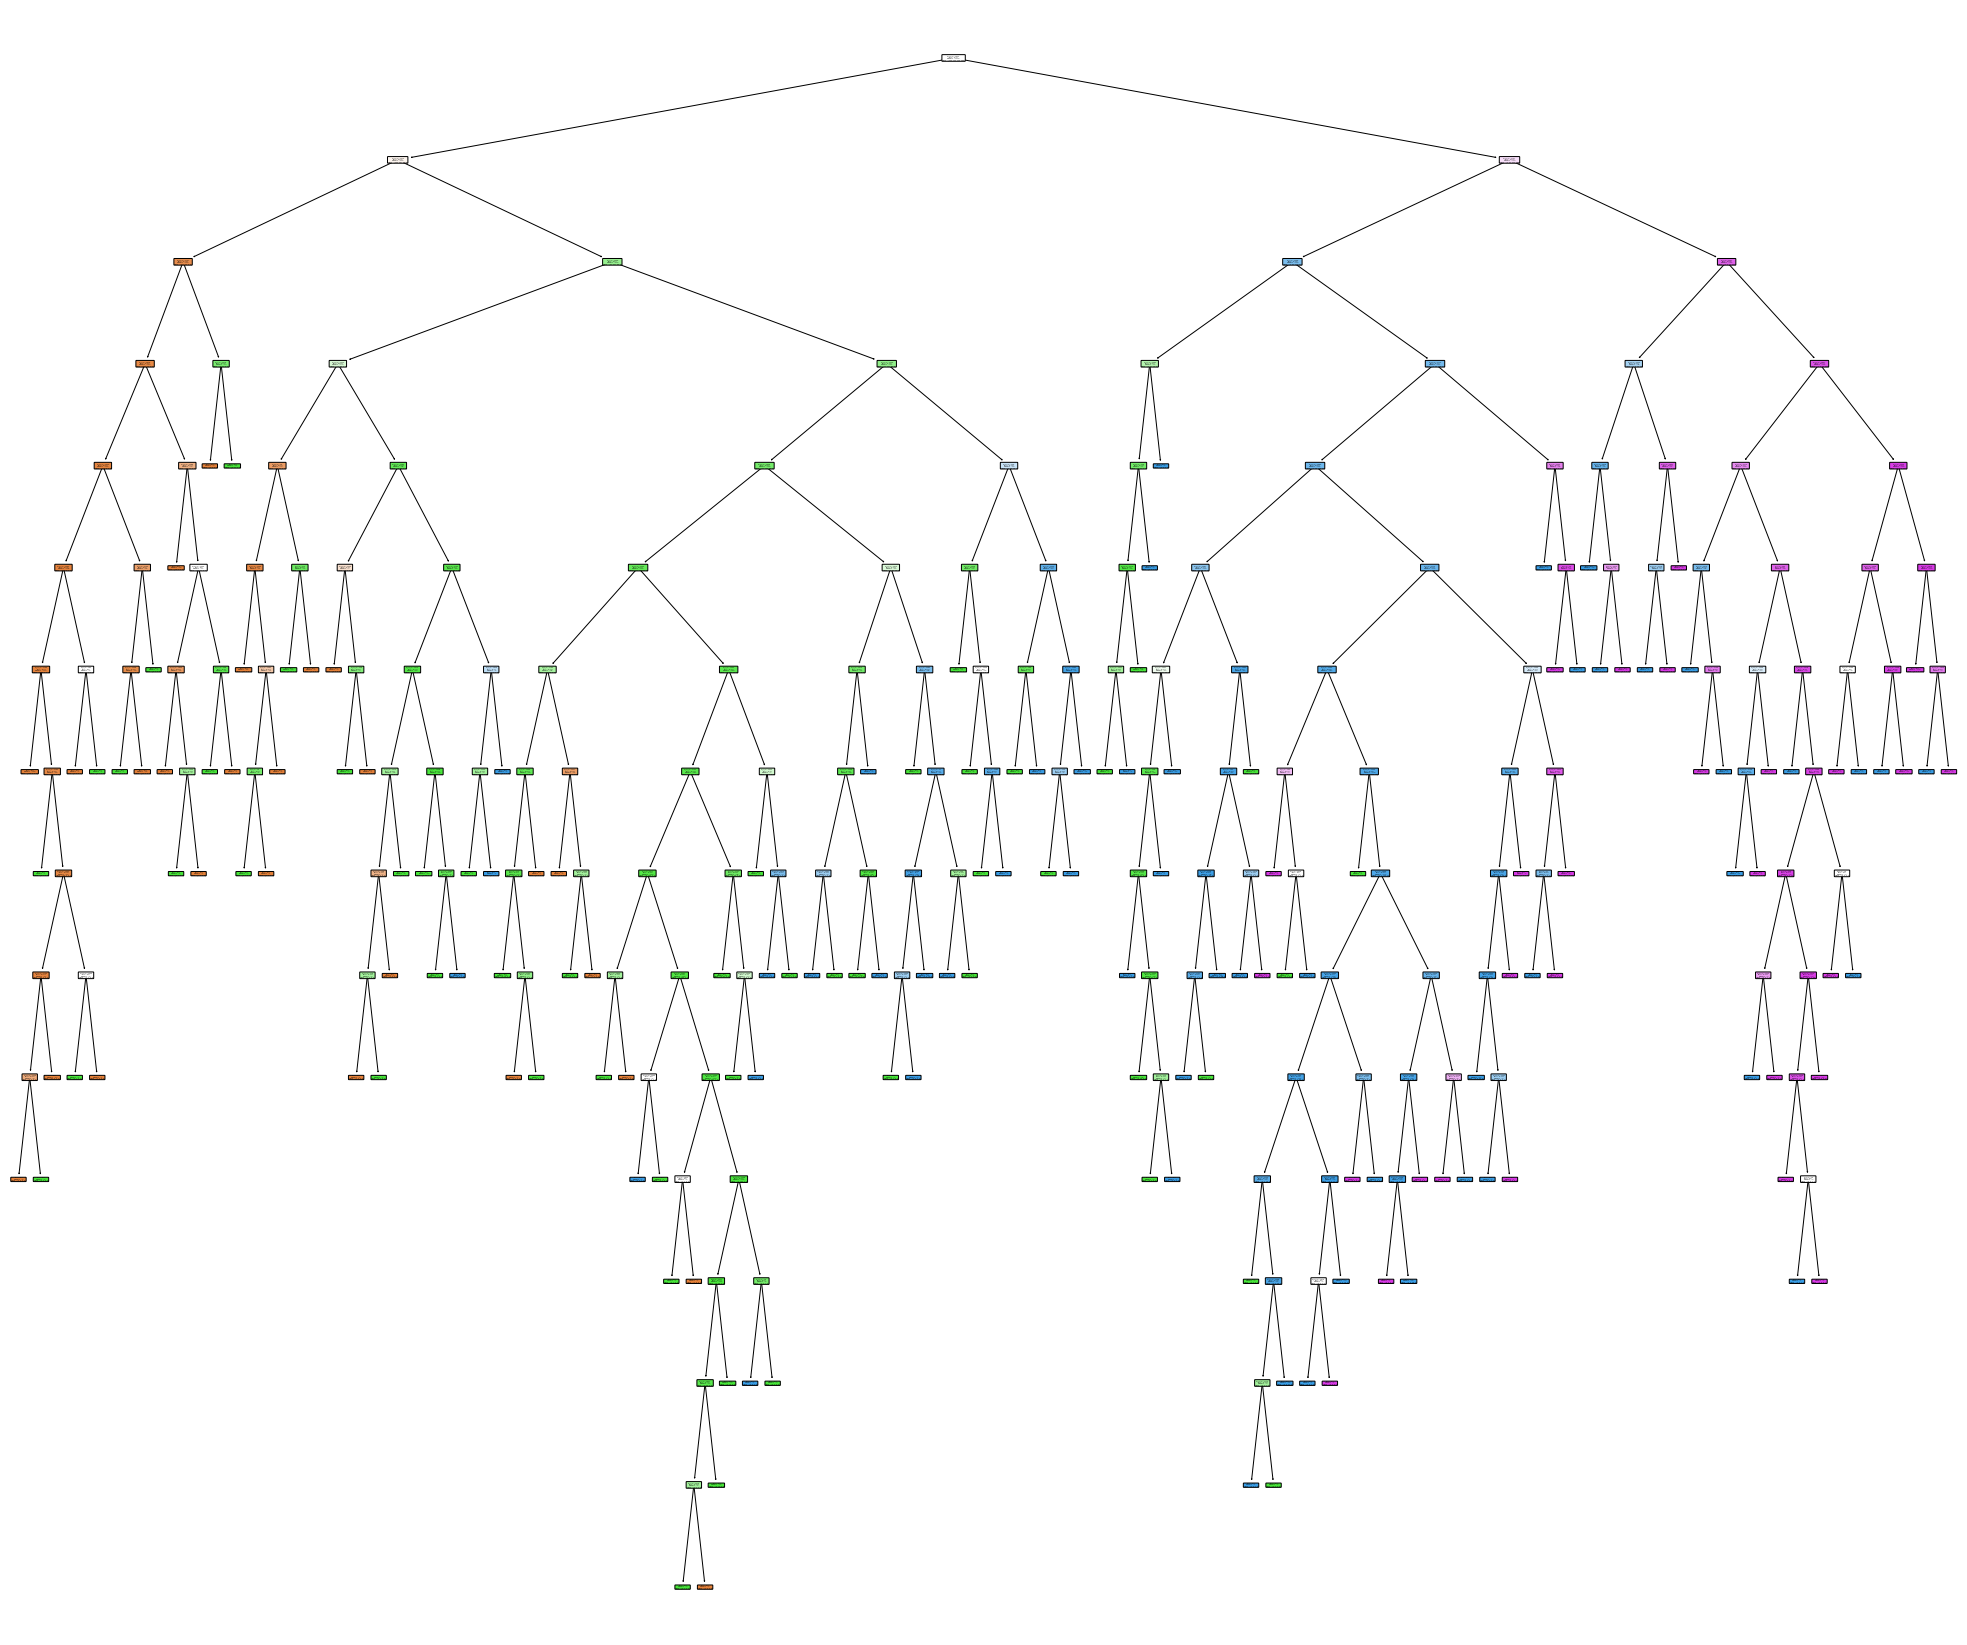

In [20]:
clf1 = tree.DecisionTreeClassifier(random_state=42)
clf1 = clf1.fit(X_train, Y_train)
fig = plt.figure(figsize=(35,30))
dot_data = tree.plot_tree(clf1, filled=True, rounded=True, rotate=True) 

#**Decision Tree Regressor**

In [21]:
for max_depth_values in [1, 2, 3, 4, 5, 7, 9, 11, 14, 17, 20, 25, 30, 35]:
  dtr = DecisionTreeRegressor(max_depth=max_depth_values, criterion='mse', max_features=20).fit(X_train, Y_train) 
  scoretrain = dtr.score(X_train, Y_train)
  scoretest = dtr.score(X_test, Y_test) 
  print("Decision Tree of max_depth: {}, Training Score: {:2f}, Testing Score: {:2f}\n".format(max_depth_values, scoretrain, scoretest))

Decision Tree of max_depth: 1, Training Score: 0.663135, Testing Score: 0.697914

Decision Tree of max_depth: 2, Training Score: 0.818250, Testing Score: 0.825571

Decision Tree of max_depth: 3, Training Score: 0.856576, Testing Score: 0.851360

Decision Tree of max_depth: 4, Training Score: 0.895513, Testing Score: 0.894125

Decision Tree of max_depth: 5, Training Score: 0.931091, Testing Score: 0.900729

Decision Tree of max_depth: 7, Training Score: 0.977476, Testing Score: 0.902297

Decision Tree of max_depth: 9, Training Score: 0.997261, Testing Score: 0.878219

Decision Tree of max_depth: 11, Training Score: 0.998983, Testing Score: 0.898234

Decision Tree of max_depth: 14, Training Score: 1.000000, Testing Score: 0.889450

Decision Tree of max_depth: 17, Training Score: 1.000000, Testing Score: 0.893198

Decision Tree of max_depth: 20, Training Score: 1.000000, Testing Score: 0.880082

Decision Tree of max_depth: 25, Training Score: 1.000000, Testing Score: 0.883829

Decision Tr

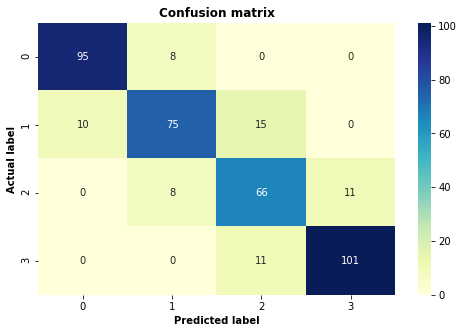

In [22]:
y_pred = dtr.predict(X_test)  
cm = confusion_matrix(y_pred, Y_test) 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');

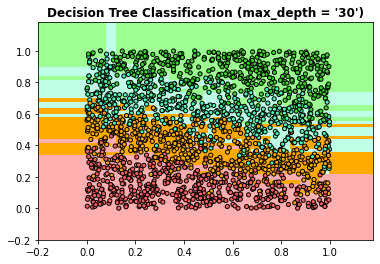

In [23]:
h =0.02
max_depth_value = 30
dtr1 = DecisionTreeRegressor(max_depth=max_depth_value, criterion='mse')
dtr1.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dtr1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm_dark, edgecolor='k', s=17)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Tree Classification (max_depth = '%s')"% (max_depth_value), fontweight='bold')

plt.show()

#**Tree Visualization**

Let's see how each node of the regressor tree looks, so I'm setting the max_depth to 3:

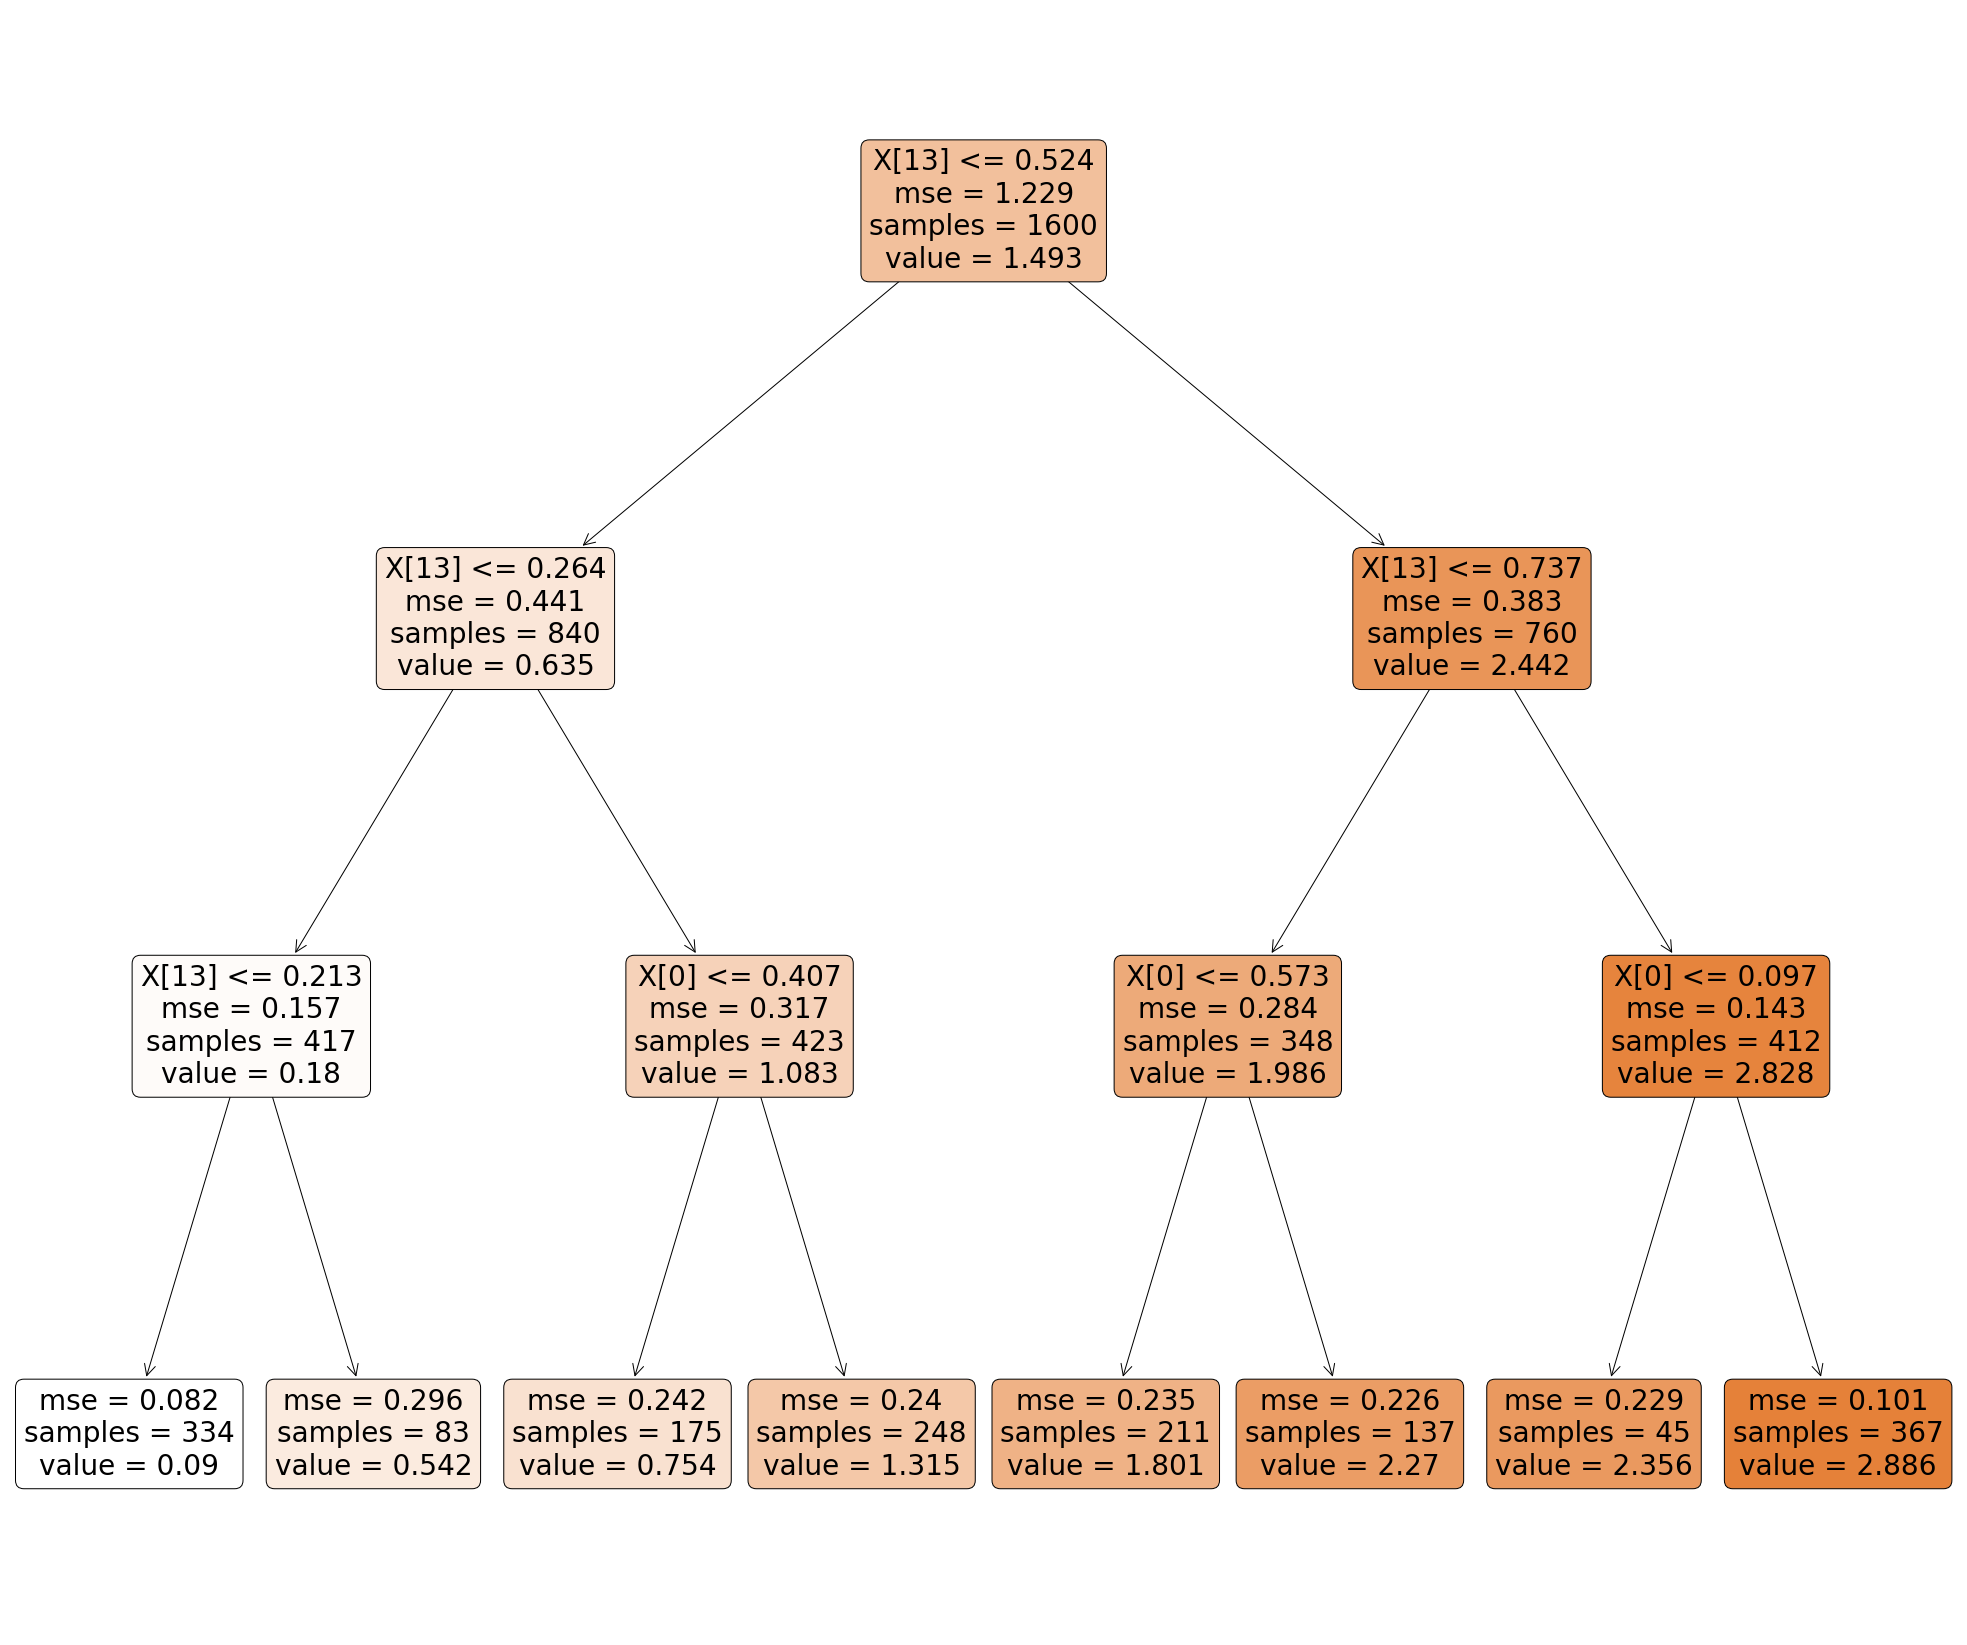

In [24]:
from sklearn import tree
clf2 = tree.DecisionTreeRegressor(random_state=42, max_depth=3)
clf2 = clf2.fit(X_train, Y_train)
fig = plt.figure(figsize=(35,30))
dot_data = tree.plot_tree(clf2, filled=True, rounded=True, rotate=True) 

Let's see the complete regressor Tree:

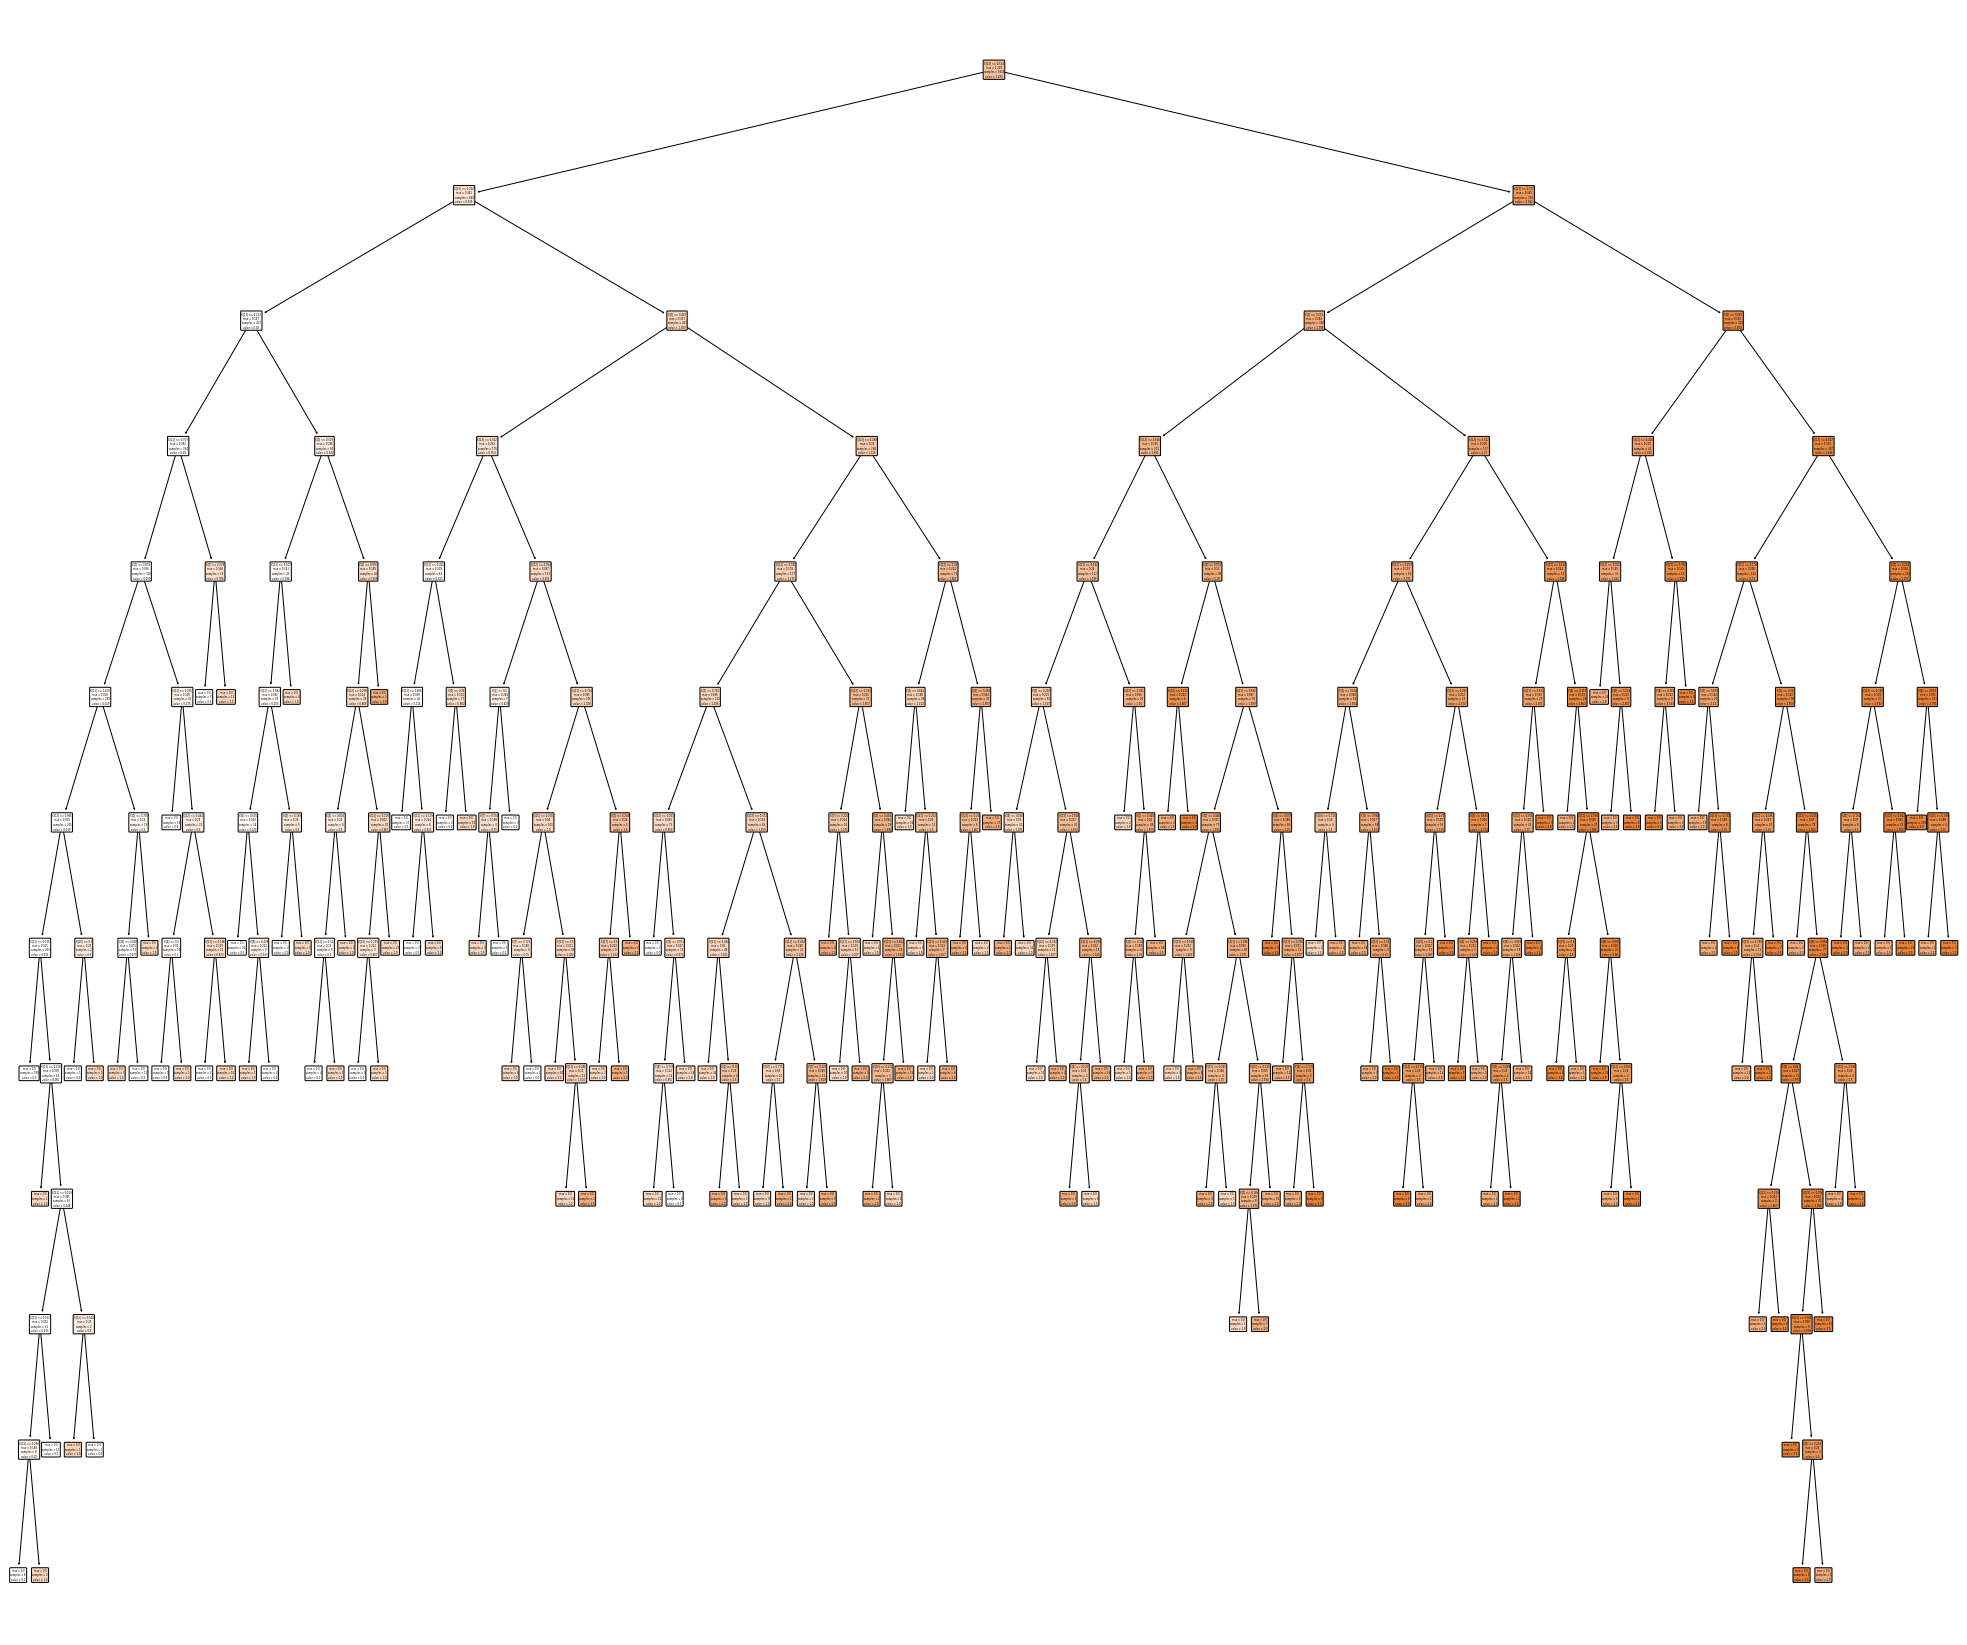

In [25]:
clf3 = tree.DecisionTreeRegressor(random_state=42)
clf3 = clf3.fit(X_train, Y_train)
fig = plt.figure(figsize=(35,30))
dot_data = tree.plot_tree(clf3, filled=True, rounded=True, rotate=True) 

#**GridSearchCV!!**

You can pass your model parameters and GridSearch will return the best parameters that fit the dataset for that classifier.

In [26]:
# grid search method 
param_grid = {'max_depth': [1, 2, 3, 5, 7, 10, 15, 17, 19, 20],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3, 4, 5]}
GS = GridSearchCV(DecisionTreeClassifier(),param_grid) 
GS.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [27]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2} are the best.
the best score is 0.86.


#**Advanced Tree Visualization**

Here, I'm writing a function which display how the model fits the dataset using scatter plot, meshgrid and contourf plot, to help us visualize the output of the classifier:

In [28]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(x, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.figure(figsize=(30,35))

As you can see if your max_depth hyperparameter is low, the classifier underfits the dataset.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


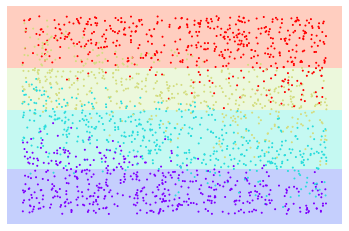

<Figure size 2160x2520 with 0 Axes>

In [29]:
visualize_classifier(DecisionTreeClassifier(max_depth=2), x, y)

If the max_depth hyperparameter is too high, the classifier overfits the dataset.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


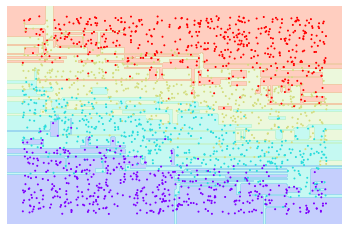

<Figure size 2160x2520 with 0 Axes>

In [30]:
visualize_classifier(DecisionTreeClassifier(max_depth=15), x, y)

`You can avoid overfitting Decision Tree by using Random Forest Classifier or Tree Pruning methods. In practice, DT always fit the training data perfectly with 100 accuracy (if labels are not noisy) because:`
- DT's have no learning bias.
- Lots of varaince in data.

#**Summary:**
-  You have learned how to train a DT 
- Optimal hyperparameter searching with GridSearchCV
- Advanced Visualization Techniques 

#**References:**
- [DT](https://scikit-learn.org/stable/modules/tree.html)
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)